In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the dataset

df = pd.read_csv('height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


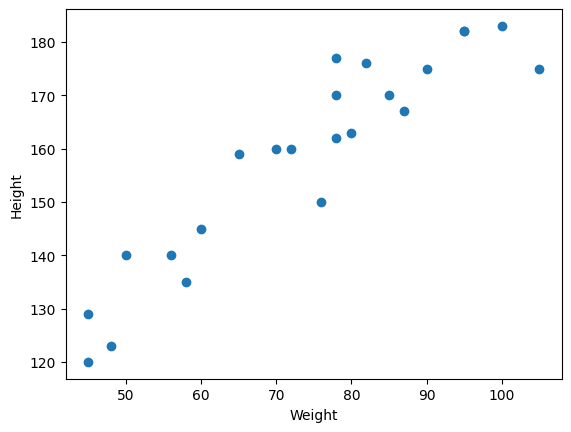

In [4]:
#plotting the graph

plt.scatter(df['Weight'] , df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height');

In [5]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


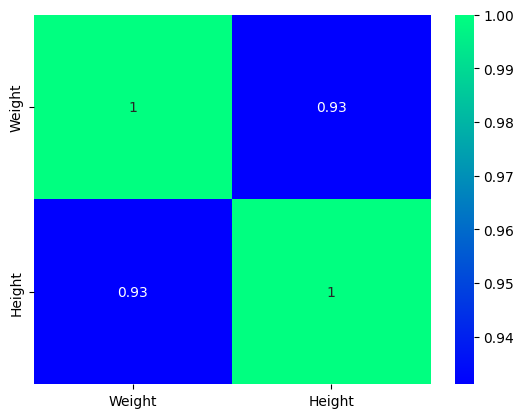

In [6]:
sns.heatmap(df.corr() , annot=True,cmap='winter');

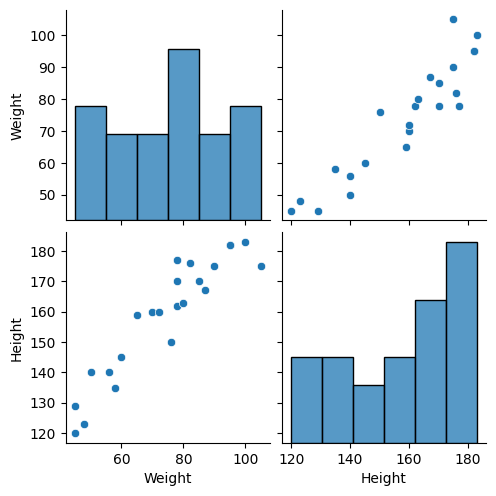

In [7]:
#pltting the graph
sns.pairplot(df);

In [8]:
#splitting the data

X = df[['Weight']] #- Input features should be in Dataframe while output can be a series form
y = df['Height']

In [9]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [10]:
X_train.shape , y_train.shape

((18, 1), (18,))

In [11]:
#standardization

#z-score : (x-mean)/std

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit_transform(X_train)

#we only fit_transform training set and on predict set X_test will just transform it uses x_train's mean and std

array([[-0.47100984],
       [ 1.09902297],
       [ 0.10466885],
       [-0.73268198],
       [ 0.5756787 ],
       [-1.51769839],
       [ 0.20933771],
       [-1.36069511],
       [ 0.83735084],
       [-0.83735084],
       [ 1.09902297],
       [-1.51769839],
       [-0.10466885],
       [-1.25602625],
       [ 0.68034755],
       [ 1.36069511],
       [ 1.62236724],
       [ 0.20933771]])

In [12]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) #-scaling is required for everty algo except DT,RF

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(n_jobs=-1).fit(X_train,y_train)

In [14]:
print("Coefficient : ", lr.coef_)
print("Intercept : " ,lr.intercept_)

Coefficient :  [19.29395883]
Intercept :  157.88888888888889


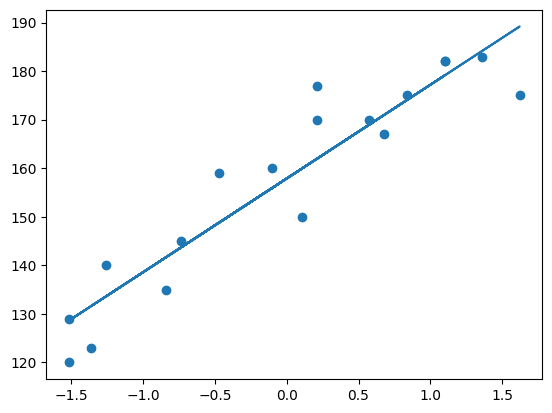

In [15]:
#plotting graph of best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,lr.predict(X_train))

In [16]:
y_pred = lr.predict(X_test)

In [17]:
from sklearn.metrics import mean_squared_error , mean_absolute_error

print("MSE : ",mean_squared_error(y_test,y_pred))
print("MAE : ",mean_absolute_error(y_test,y_pred))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE :",rmse)

MSE :  27.89462679967404
MAE :  3.497829174274699
RMSE : 5.2815364052209315


In [18]:
from sklearn.metrics import r2_score

print("R2-Score" , r2_score(y_test,y_pred))

R2-Score 0.791457634571815


In [24]:
#adjusted r2-score
#Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]


1- (1-r2_score(y_test,y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7219435127624199

In [20]:
import statsmodels.api as sm 

In [21]:
model = sm.OLS(y_train,X_train).fit()

In [22]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.015
Model:                            OLS   Adj. R-squared (uncentered):             -0.043
Method:                 Least Squares   F-statistic:                             0.2533
Date:                Tue, 11 Jun 2024   Prob (F-statistic):                       0.621
Time:                        09:52:34   Log-Likelihood:                         -116.67
No. Observations:                  18   AIC:                                      235.3
Df Residuals:                      17   BIC:                                      236.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

g:\GeekDS\venv\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


In [23]:
## Prediction For new data
print("Without Scalling : ",lr.predict([[72]])) #- see without scalling the unseen data array([1485.11570683]) this is giving much higher output

#interpretetion : so means who have Weight is 72 then height is 1485
#we have to do scalling prediction
print("After Scalling : ",lr.predict(sc.transform([[72]])))

Without Scalling :  [1547.05392446]
After Scalling :  [155.86941232]


g:\GeekDS\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
